<a href="https://colab.research.google.com/github/SwethaSrikari/Predicting-EV-charging-demand/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An attempt at recreating [Performance Comparison of Deep Learning Approaches in Predicting EV Charging Demand](https://www.mdpi.com/2071-1050/15/5/4258#B43-sustainability-15-04258) 

Step 1 - [Web scraping](https://github.com/SwethaSrikari/Predicting-EV-charging-demand/blob/main/Web_scraping_Colorado_weather.ipynb)

Step 2 - [Data cleaning + merging of datasets](https://github.com/SwethaSrikari/Predicting-EV-charging-demand/blob/main/Data_collection%2Bcleaning.ipynb)

**Step 3 - Preparing dataset for training** - This notebook focuses on preparing the dataset for model training

In [2]:
# Import necessary libraries

import pandas as pd

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the merged dataset from step 2
df = pd.read_csv('/content/drive/MyDrive/EV_stations_demand/weather_ev.csv')
df

,Unnamed: 0,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,...,ObjectId,Date,Year,Month,Day,Maximum T,Minimum T,Precipitation,Snow,Day_of_the_week
0,0,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-01-20 07:29:00+00:00,MDT,2018-01-20 09:22:00+00:00,MDT,...,1,2018-01-20,2018,January,20,62,31,0.000,0.0,Saturday
1,1,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-02-09 16:57:00+00:00,MDT,2018-02-09 19:06:00+00:00,MDT,...,2,2018-02-09,2018,February,9,56,24,0.000,0.0,Friday
2,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-01 17:49:00+00:00,MDT,2018-01-01 19:52:00+00:00,MDT,...,3,2018-01-01,2018,January,1,30,12,0.000,0.0,Monday
3,4,BOULDER / FACILITIES ST1,1745 14th street,Boulder,Colorado,80302,2018-02-05 17:01:00+00:00,MDT,2018-02-06 11:38:00+00:00,MDT,...,5,2018-02-05,2018,February,5,53,20,0.508,0.0,Monday
4,5,BOULDER / ATRIUM ST1,1770 13th St,Boulder,Colorado,80302,2018-01-31 08:45:00+00:00,MDT,2018-01-31 11:04:00+00:00,MDT,...,6,2018-01-31,2018,January,31,59,24,0.000,0.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52403,57886,BOULDER / BASELINE ST1,600 Baseline Rd,Boulder,Colorado,80302,2023-03-31 02:46:00+00:00,MDT,2023-03-31 04:15:00+00:00,MDT,...,57887,2023-03-31,2023,March,31,51,33,0.000,0.0,Friday
52404,57887,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,2023-03-31 03:57:00+00:00,MDT,2023-03-31 10:53:00+00:00,MDT,...,57888,2023-03-31,2023,March,31,51,33,0.000,0.0,Friday
52405,57888,BOULDER / BASELINE ST1,600 Baseline Rd,Boulder,Colorado,80302,2023-03-31 04:49:00+00:00,MDT,2023-03-31 07:38:00+00:00,MDT,...,57889,2023-03-31,2023,March,31,51,33,0.000,0.0,Friday
52406,57889,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,2023-03-31 06:46:00+00:00,MDT,2023-03-31 07:35:00+00:00,MDT,...,57890,2023-03-31,2023,March,31,51,33,0.000,0.0,Friday


In [28]:
# Paper used data from January 2018 to August 2022
data = df[pd.to_datetime(df['Date']) < pd.to_datetime('2022-08-01')]
data['Date'] = data.loc[:, 'Date'].apply(pd.to_datetime)

data

<ipython-input-28-b4a96eb3bb4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data.loc[:, 'Date'].apply(pd.to_datetime)


,Unnamed: 0,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,...,ObjectId,Date,Year,Month,Day,Maximum T,Minimum T,Precipitation,Snow,Day_of_the_week
0,0,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-01-20 07:29:00+00:00,MDT,2018-01-20 09:22:00+00:00,MDT,...,1,2018-01-20,2018,January,20,62,31,0.00000,0.0,Saturday
1,1,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-02-09 16:57:00+00:00,MDT,2018-02-09 19:06:00+00:00,MDT,...,2,2018-02-09,2018,February,9,56,24,0.00000,0.0,Friday
2,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-01 17:49:00+00:00,MDT,2018-01-01 19:52:00+00:00,MDT,...,3,2018-01-01,2018,January,1,30,12,0.00000,0.0,Monday
3,4,BOULDER / FACILITIES ST1,1745 14th street,Boulder,Colorado,80302,2018-02-05 17:01:00+00:00,MDT,2018-02-06 11:38:00+00:00,MDT,...,5,2018-02-05,2018,February,5,53,20,0.50800,0.0,Monday
4,5,BOULDER / ATRIUM ST1,1770 13th St,Boulder,Colorado,80302,2018-01-31 08:45:00+00:00,MDT,2018-01-31 11:04:00+00:00,MDT,...,6,2018-01-31,2018,January,31,59,24,0.00000,0.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40088,43955,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,2022-07-31 16:47:00+00:00,MDT,2022-07-31 17:34:00+00:00,MDT,...,43956,2022-07-31,2022,July,31,90,61,0.25146,0.0,Sunday
40090,43957,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,2022-07-31 17:11:00+00:00,MDT,2022-07-31 20:37:00+00:00,MDT,...,43958,2022-07-31,2022,July,31,90,61,0.25146,0.0,Sunday
40092,43959,BOULDER / ATRIUM ST1,1770 13th St,Boulder,Colorado,80302,2022-07-31 17:37:00+00:00,MDT,2022-07-31 21:27:00+00:00,MDT,...,43960,2022-07-31,2022,July,31,90,61,0.25146,0.0,Sunday
40094,43961,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,2022-07-31 17:49:00+00:00,MDT,2022-07-31 20:20:00+00:00,MDT,...,43962,2022-07-31,2022,July,31,90,61,0.25146,0.0,Sunday


# Prepare daily, weekly and monthly aggregated datasets

In [10]:
# Daily dataset - Aggregated by sum

columns_daily = ['Energy__kWh_', 'Day_of_the_week', 'Month', 'Minimum T', 'Maximum T', 'Snow', 'Precipitation']
daily_dataset = data.groupby(['Date', 'Month', 'Day_of_the_week'], as_index=False).sum(numeric_only=True)[columns_daily]
daily_dataset # 1668 entries

,Energy__kWh_,Day_of_the_week,Month,Minimum T,Maximum T,Snow,Precipitation
0,6.504,Monday,January,12,30,0.0,0.00000
1,17.527,Tuesday,January,24,92,0.0,0.00000
2,11.227,Wednesday,January,60,150,0.0,0.00000
3,49.748,Thursday,January,144,312,0.0,0.00000
4,2.956,Friday,January,50,124,0.0,0.00000
...,...,...,...,...,...,...,...
1663,502.929,Wednesday,July,4060,6020,0.0,0.00000
1664,418.319,Thursday,July,2580,3526,0.0,1212.34200
1665,389.422,Friday,July,3248,4536,0.0,42.67200
1666,654.377,Saturday,July,3264,5824,0.0,0.00000


In [41]:
# Weekly dataset - Aggregated by sum

columns_weekly = ['Energy__kWh_', 'Day', 'Minimum T', 'Maximum T', 'Snow', 'Precipitation']
weekly_dataset = data.groupby(pd.Grouper(freq='W', key='Date')).sum(numeric_only=True)[columns_weekly]
weekly_dataset # 239 entries

,Energy__kWh_,Day,Minimum T,Maximum T,Snow,Precipitation
Date,,,,,,
2018-01-07,151.294,112,590,1288,0.00,0.00000
2018-01-14,275.012,428,1160,2110,0.00,2.03200
2018-01-21,267.165,668,809,2053,403.86,35.56000
2018-01-28,455.483,1802,1616,3522,0.00,0.00000
2018-02-04,436.939,801,1547,3314,137.16,8.38200
...,...,...,...,...,...,...
2022-07-03,3648.711,6401,21292,33766,0.00,176.49444
2022-07-10,3146.682,2455,19476,31395,0.00,342.46058
2022-07-17,3797.209,5862,24846,38266,0.00,490.82198


In [12]:
# Monthly dataset - Aggregated by sum

columns_monthly = ['Energy__kWh_', 'Month', 'Minimum T', 'Maximum T', 'Snow', 'Precipitation']
monthly_dataset = data.groupby(['Month', 'Year', ], as_index=False).sum(numeric_only=True)[columns_monthly]
monthly_dataset # 55 entries

,Energy__kWh_,Month,Minimum T,Maximum T,Snow,Precipitation
0,3265.193,April,14645,28298,2233.7522,478.13214
1,6603.784,April,26878,47807,5475.4780,1022.47954
2,1015.725,April,3627,6755,1551.8892,147.03298
3,5079.777,April,19534,37654,5938.5200,1181.35400
4,12769.896,April,44049,87893,100.5840,160.77438
5,4495.475,August,31778,50141,0.0000,85.97646
6,8078.619,August,53226,82956,115.6716,115.93830
7,3409.008,August,20795,33397,0.0000,136.77392
8,9953.984,August,65718,102646,0.0000,709.09180
9,6982.154,December,19481,44014,2920.8222,189.97930


# Statistical summary of the aggregated EV charging records match the values in the paper

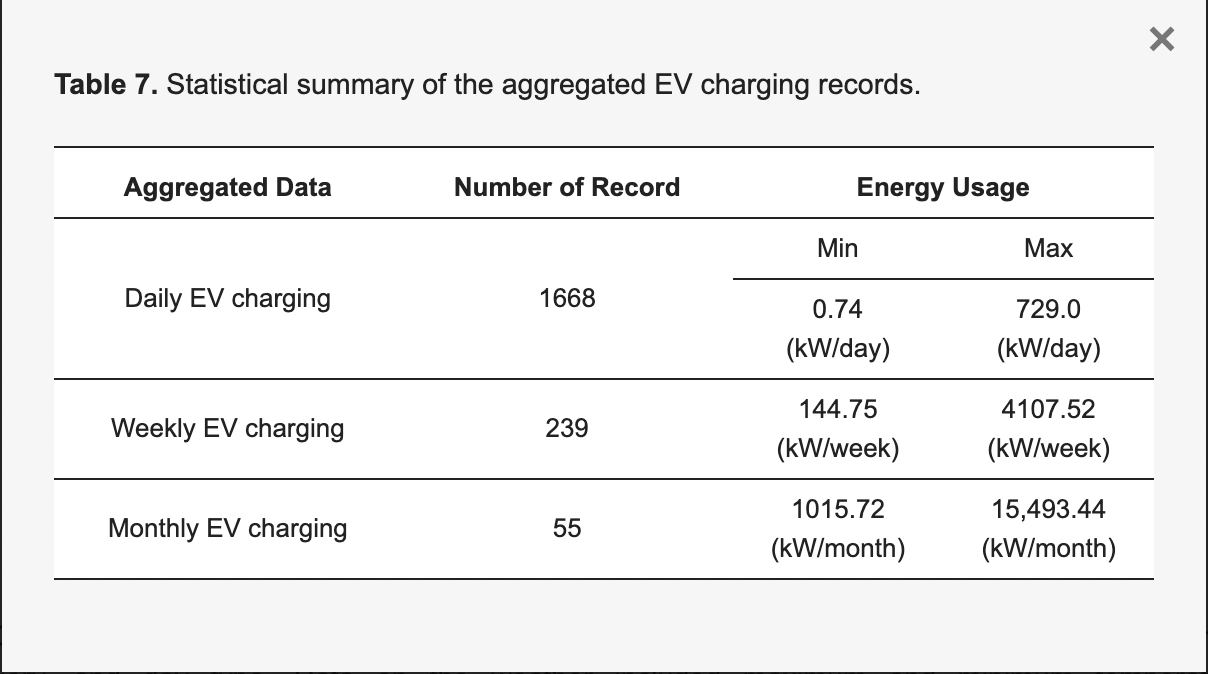

In [44]:
daily_dataset['Energy__kWh_'].describe()[['count', 'min', 'max']]

count    1668.000
min         0.749
max       729.001
Name: Energy__kWh_, dtype: float64

In [46]:
weekly_dataset['Energy__kWh_'].describe()[['count', 'min', 'max']]

count     239.000
min       144.751
max      4107.525
Name: Energy__kWh_, dtype: float64

In [45]:
monthly_dataset['Energy__kWh_'].describe()[['count', 'min', 'max']]

count       55.000
min       1015.725
max      15493.446
Name: Energy__kWh_, dtype: float64